Violeta García

<img style="float: left; margin: 15px 15px 15px 15px;" src="http://www.unionjalisco.mx/sites/default/files/styles/galeria/public/field/image/iteso_3_1.jpg?itok=M6pp1pEQ" width="180" height="50" />

# Simulación de Procesos Financieros

## <font color= blue > Tarea VI
   Generación de números aleatorios con el método de la transformada inversa y el de aceptación rechazo

In [67]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize

>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
> ### Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa 
Grafique en una gráfica el historias 100 muestras generadas y comparela con el función F(x) dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

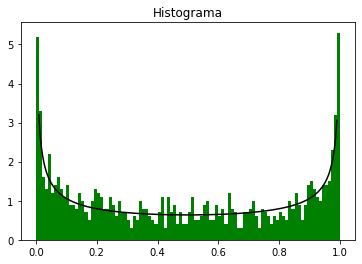

In [112]:
# Se nos da la función de prob acumulada, por tanto esa se utiliza para generar los aleatorios
# Para comprobar, se deriva para sacar f(x), y los puntos generados deben estar bajo esta curva
u = np.random.rand(1000)
fx = np.sin(np.pi/2 * u)**2

x = np.arange(0.01,0.99,0.001)
y = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))
plt.plot(x,y, color = 'black')
plt.hist(fx, 100, density=True, color = 'green')
plt.title('Histograma')
plt.show()

> ### Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$
> Sabiendo que:
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$

$$ p_i+1=\frac{n!}{(i+1)!(n-(i+1))!}p^(i+1)(1-p)^{n-(i+1)}$$

$$ p_i+1=\frac{n!}{(i+1)(i)!(i+1)(n-i)!}p^(i+1)(1-p)^{n-(i+1)}$$

Buscando $p_i$ queda $$p_{i+1}=\frac{n-i}{(1+i)}P \frac {p_i}{1-p}$$

> ### Genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
>  
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$

$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(1+k)k!}$$

Es posible ver que ahi se encuentra $P(k, \lambda)$, entonces
$$P(k + 1)=\frac{\lambda}{(1+k)} P(k,\lambda) $$

In [107]:

def P_acum_Poisson_o(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]=l/(i+1)*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

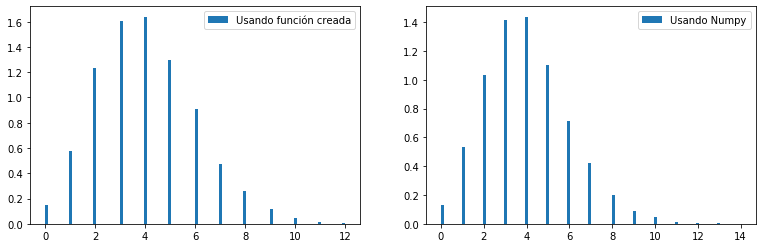

In [111]:
n = 12; l = 4; N = 10**4

p_acum = P_acum_Poisson_o(n,l)
u = np.random.rand(N)

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_pois = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.hist(d_pois,100,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_pois_numpy = np.random.poisson(l,N)
plt.hist(d_pois_numpy,100,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()



>Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
>$$f(x)=30(x^2-2x^3+x^4)$$
>Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. 

Debido a que la funcion de probabilidad F(x) no es facil despejar x, la cual es la siguiente
$$f(x)=30(x^2-2x^3+x^4)$$  $$\int_{0}^{x}30(y^2-2y^3+y^4) dy = 10x^3 - 15x^4 + 6x^5 = F(x) $$
Se utiliza el método de aceptación rechazo, utilizando una funcion que sobrepase $f(x)$ siendo esta: $t(x) = a\sin(\pi x)$ entonces se generan variables aleatoria que sigan esta distribución, la cual es mas facil de integrar: 
$$\int_{0}^{x}\sin(\pi y) dy = \dfrac {1}{\pi}(-\cos(\pi x) - \dfrac {1}{\pi}) = G(X) $$
Se despeja x para con esto generar aleatorios, ya que se sabe que $G(x)$ solo va de $[0, 1]$ entonces lo podemos poner como un aleatorio uniforme entre 0 y 1
$$\dfrac{1}{\pi}\arccos(1-u\pi)  = x$$

In [234]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variable distribuida U~U(0,1)',
                 R1:'Variable distribuida como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    elem = [x for x in range(len(R1)) if condition[x]]
    return elem            
    plt.show()

El maximo de fx, es:  [1.875]


C:\Users\sally\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in arccos


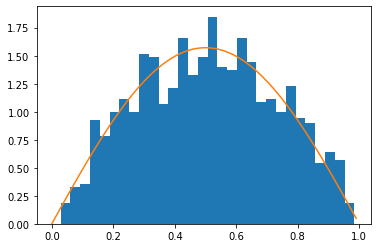

C:\Users\sally\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


El porcentaje de puntos aceptados es:  0.5515


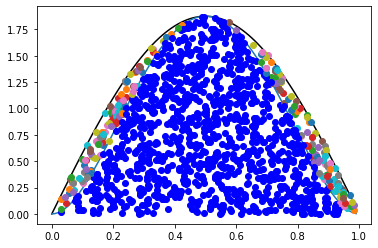

In [286]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo

f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
c = f(optimize.fmin(lambda x:-f(x),0,disp=False))
print('El maximo de fx, es: ',c)
# Función t -> Función a*sin(pi*x)
x = np.arange(0, 1, 0.01)
a = c

t = lambda x: a*np.sin(np.pi*x)
g = lambda x: np.pi/2*np.sin(np.pi*x)

N = 2000
R2 = np.random.rand(N)
u = np.random.uniform(0, 1, N)

R1 =  (1/np.pi)*np.arccos(1-(u*np.pi))

plt.hist(R1, 30, density = True)
plt.plot(x, g(x))
plt.show()

plt.plot(x,t(x), color = 'black')
plt.plot(x,f(x),label='f(x)')

acep1 = Acep_rechazo(R2, R1, f, t)

porcent = len(acep1)/N
print('El porcentaje de puntos aceptados es: ', porcent)


C:\Users\sally\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


Mientras que con una constante es menor: 0.222


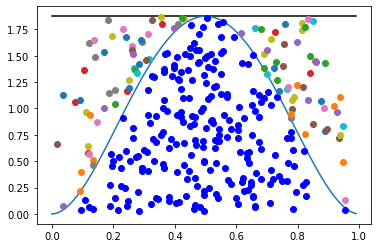

In [281]:
t2 = lambda x: c*np.ones(len(x))

plt.plot(x,t2(x), color = 'black')
plt.plot(x,f(x),label='f(x)')
acep1 = Acep_rechazo(R2, R1, f, t2)

porcent = len(acep1)/N
print('Mientras que con una constante es menor:', porcent)

> ### Genere una variable aleatoria $X$ a partir de la siguiente PDF
> $$f(x)=20x(1-x)^3$$ 

El máximo de f es: [2.109375]


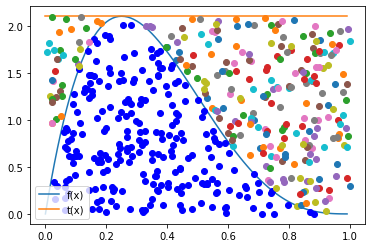

In [257]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

s = Acep_rechazo(R2,R1,f,t)